### New York City Airbnb data:

#### This is a dataset that contains Airbnb data on New York City. You will use it to practice your new EDA (exploratory data analysis) and data cleaning skills.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

##### Step 1: Use the following online dataset: https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv

In [2]:
# Read the dataset from the URL and assing it to a Pandas DataFrame
df_airbnb_ny = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df_airbnb_ny

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


##### Step 2: Find patterns and valuable information as much as you can. Make graphs that help us understand the patterns found, get some statistics, create new variables if needed, etc.

In [3]:
# Obtain the information of the dataset
df_airbnb_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that there are 16 columns and 48895 rows in the dataset.
- There are some missing values in the columns 'name', 'host_name', 'last_review' and 'reviews_per_month'.

This dataset has 6 numerical columns and 10 categorical columns:
- The numerical columns are: 'id', 'host_id', 'latitude', 'longitude', 'price' and 'minimum_nights'
- The categorical columns are: 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'

In [4]:
# We can assume that the columns 'id', 'name', 'host_name', 'last_review' and 'reviews_per_month' are not relevant for our analysis because there are missing values and they are not relevant for our analysis
# We are going to drop these columns from the dataset
df_airbnb_ny = df_airbnb_ny.drop(['id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis=1)
df_airbnb_ny.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [5]:
# let's rename the column 'neighbourhood_group' to 'areas' and 'neighbourhood' to 'neighborhood' to make it easier to understand
df_airbnb_ny.rename(columns={'neighbourhood_group':'areas', 'neighbourhood':'neighborhood'}, inplace=True)
# We check again the information of the dataset
df_airbnb_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   areas                           48895 non-null  object 
 2   neighborhood                    48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


##### Univariant analysis of the categorical variables

In [6]:
# Now, we have a dataset with 48,895 rows and 7 columns and we can start to explore the data
# Let's check the distribution of the data
df_airbnb_ny.describe(include='all')

,host_id,areas,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
unique,NaN,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,NaN,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN
mean,6.762001e+07,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.000000,227.000000


For the categorical variables, we can see the following:
- There are 5 areas in the dataset: Brooklyn, Manhattan, Queens, Staten Island and Bronx and the most frequent area is Manhattan
- There are 221 neighborhoods in the dataset and the most frequent neighborhood is Williamsburg
- There are 3 types of rooms: Entire home/apt, Private room and Shared room and the most frequent type of room is Entire home/apt

For the numerical variables, we can see the following:
- The minimum price is 0, which is not possible, so we need to check this. The maximum price is 10,000, which is a very high price because the 75% of the prices are less than 175.
- The minimum number of nights is 1, which is the most frequent number of nights. The maximum number of nights is 1,250, which is a very high number of nights because the 75% of the number of nights are less than 5.

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

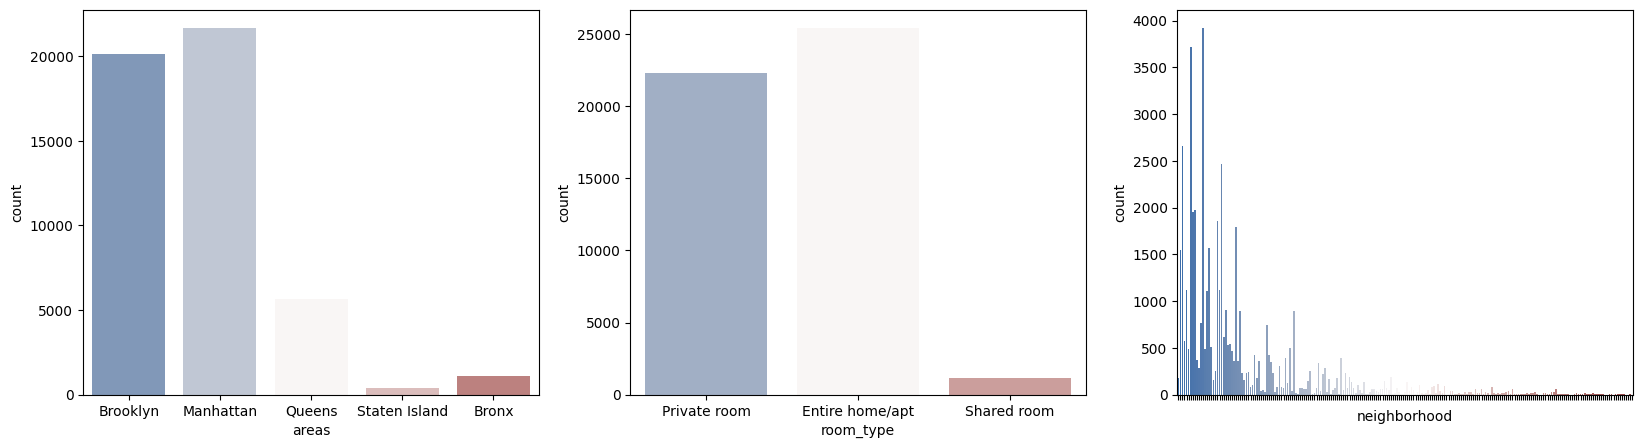

In [7]:
# We can see this better with a counterplot of the categorical columns
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Countplot for 'areas'
sns.countplot(data = df_airbnb_ny, x = 'areas', ax=ax[0], palette='vlag')
# Countplot for 'room_type'
sns.countplot(data = df_airbnb_ny, x = 'room_type', ax=ax[1], palette='vlag')
# Countplot for 'neighborhood' without xticks
sns.countplot(data = df_airbnb_ny, x = 'neighborhood', ax=ax[2], palette='vlag').set_xticklabels([])
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

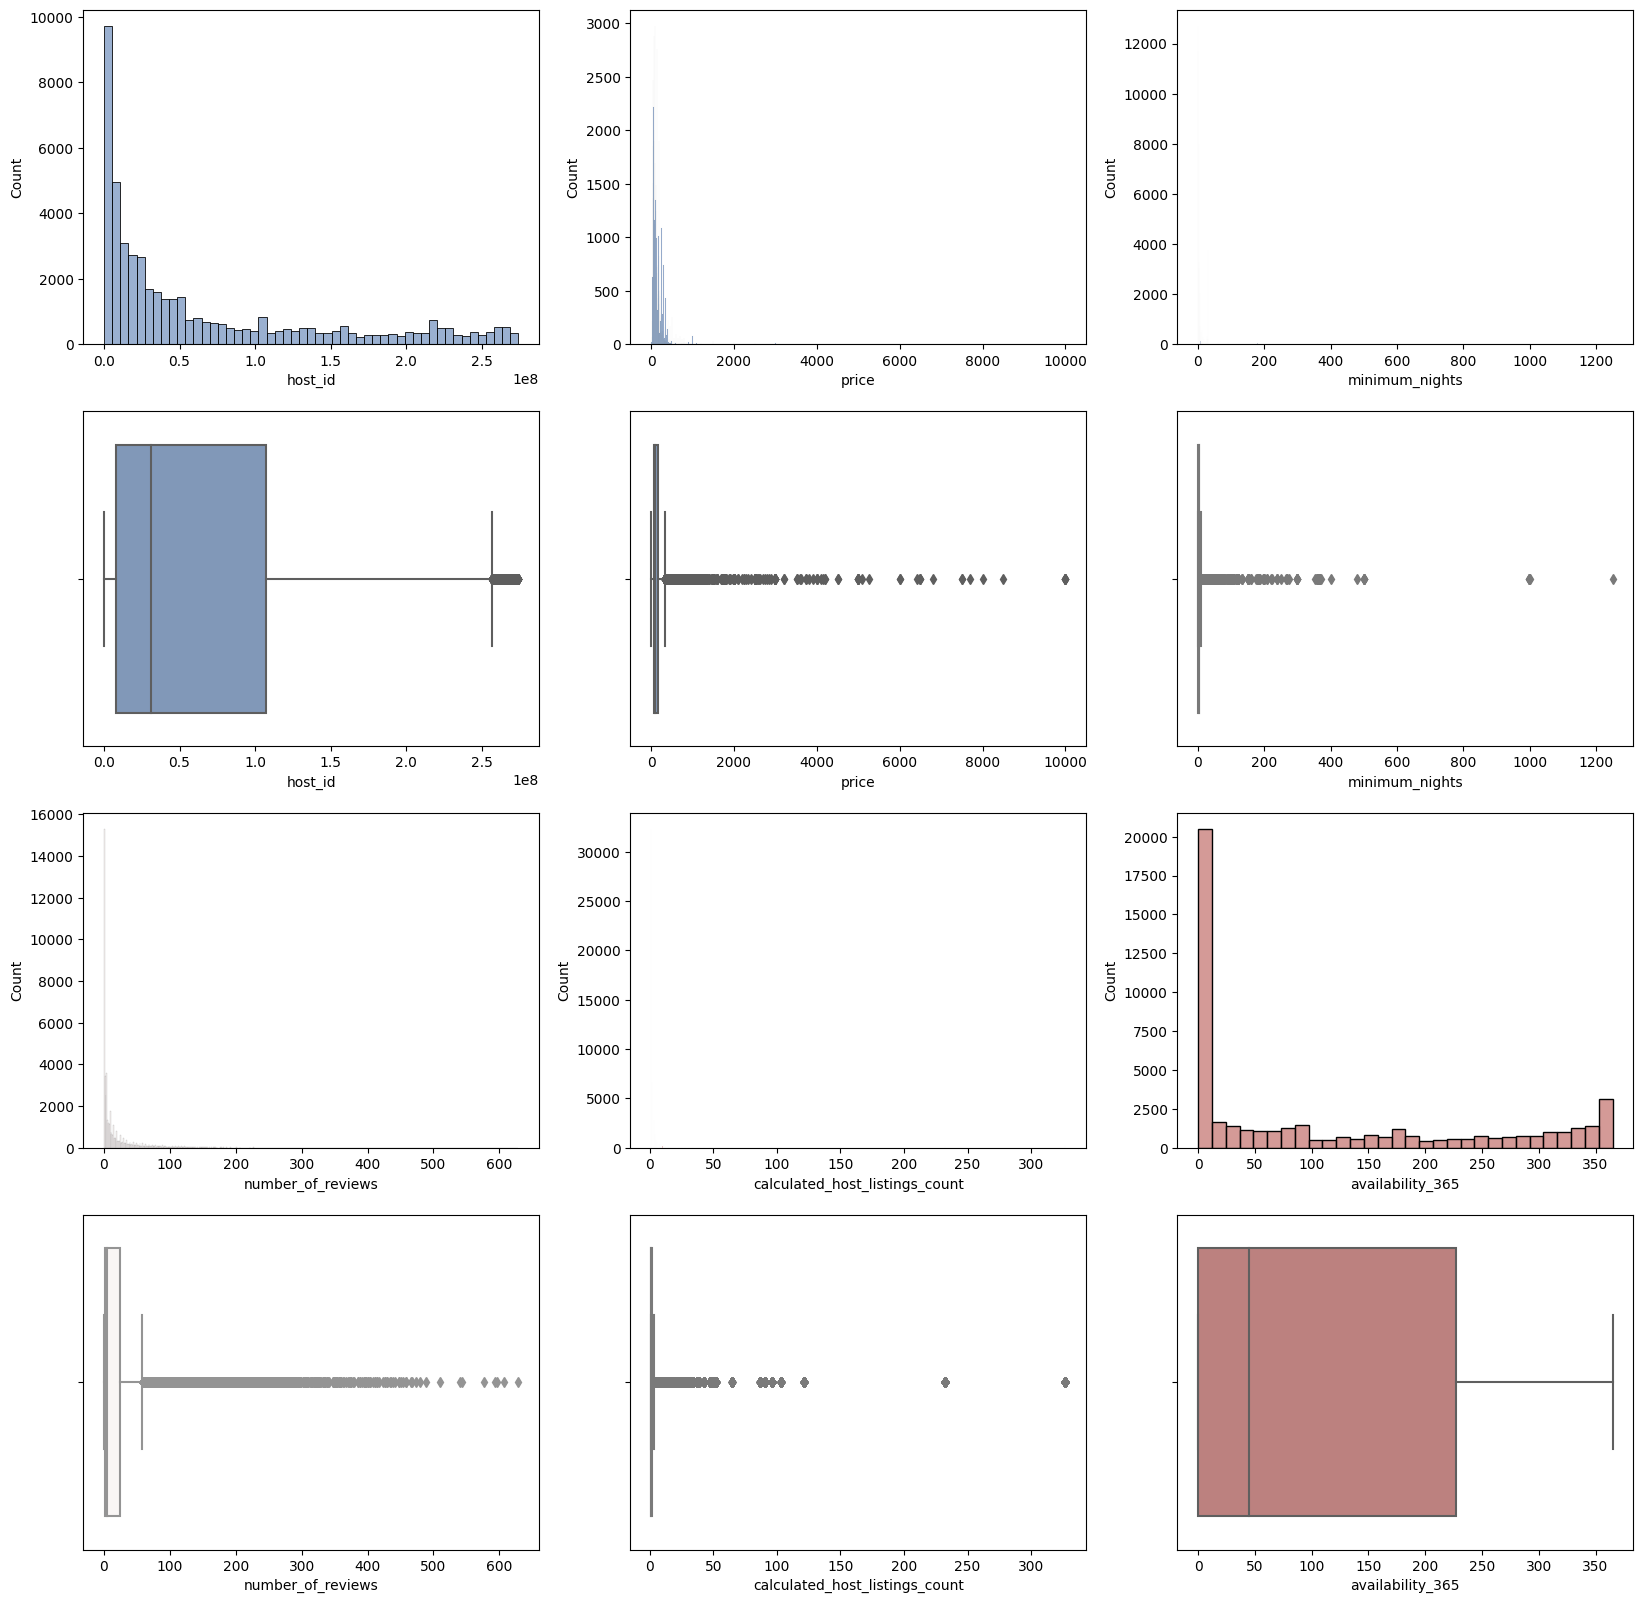

In [8]:
# Now, we are going to check the distribution of the numerical columns with a histogram and a boxplot
fig, ax = plt.subplots(4, 3, figsize=(20, 20))

colors = sns.color_palette("vlag", 5)

# Histogram for 'host_id'
sns.histplot(data = df_airbnb_ny, x = 'host_id', ax=ax[0,0], color=colors[0])
# Boxplot for 'host_id'
sns.boxplot(data = df_airbnb_ny, x = 'host_id', ax=ax[1,0], color=colors[0])
# Histogram for 'price'
sns.histplot(data = df_airbnb_ny, x = 'price', ax=ax[0,1], color=colors[0])
# Boxplot for 'price'
sns.boxplot(data = df_airbnb_ny, x = 'price', ax=ax[1,1], color=colors[0])
# Histogram for 'minimum_nights'
sns.histplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[0,2], color=colors[1])
# Boxplot for 'minimum_nights'
sns.boxplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[1,2], color=colors[1])
# Histogram for 'number_of_reviews'
sns.histplot(data = df_airbnb_ny, x = 'number_of_reviews', ax=ax[2,0], color=colors[2])
# Boxplot for 'number_of_reviews'
sns.boxplot(data = df_airbnb_ny, x = 'number_of_reviews', ax=ax[3,0], color=colors[2])
# Histogram for 'calculated_host_listings_count'
sns.histplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', ax=ax[2,1], color=colors[3])
# Boxplot for 'calculated_host_listings_count'
sns.boxplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', ax=ax[3,1], color=colors[3])
# Histogram for 'availability_365'
sns.histplot(data = df_airbnb_ny, x = 'availability_365', ax=ax[2,2], color=colors[4])
# Boxplot for 'availability_365'
sns.boxplot(data = df_airbnb_ny, x = 'availability_365', ax=ax[3,2], color=colors[4])

plt.show()


We can see that there are outliers in the columns 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' and 'availability_365'

##### Analysis of Multivariate Variables

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

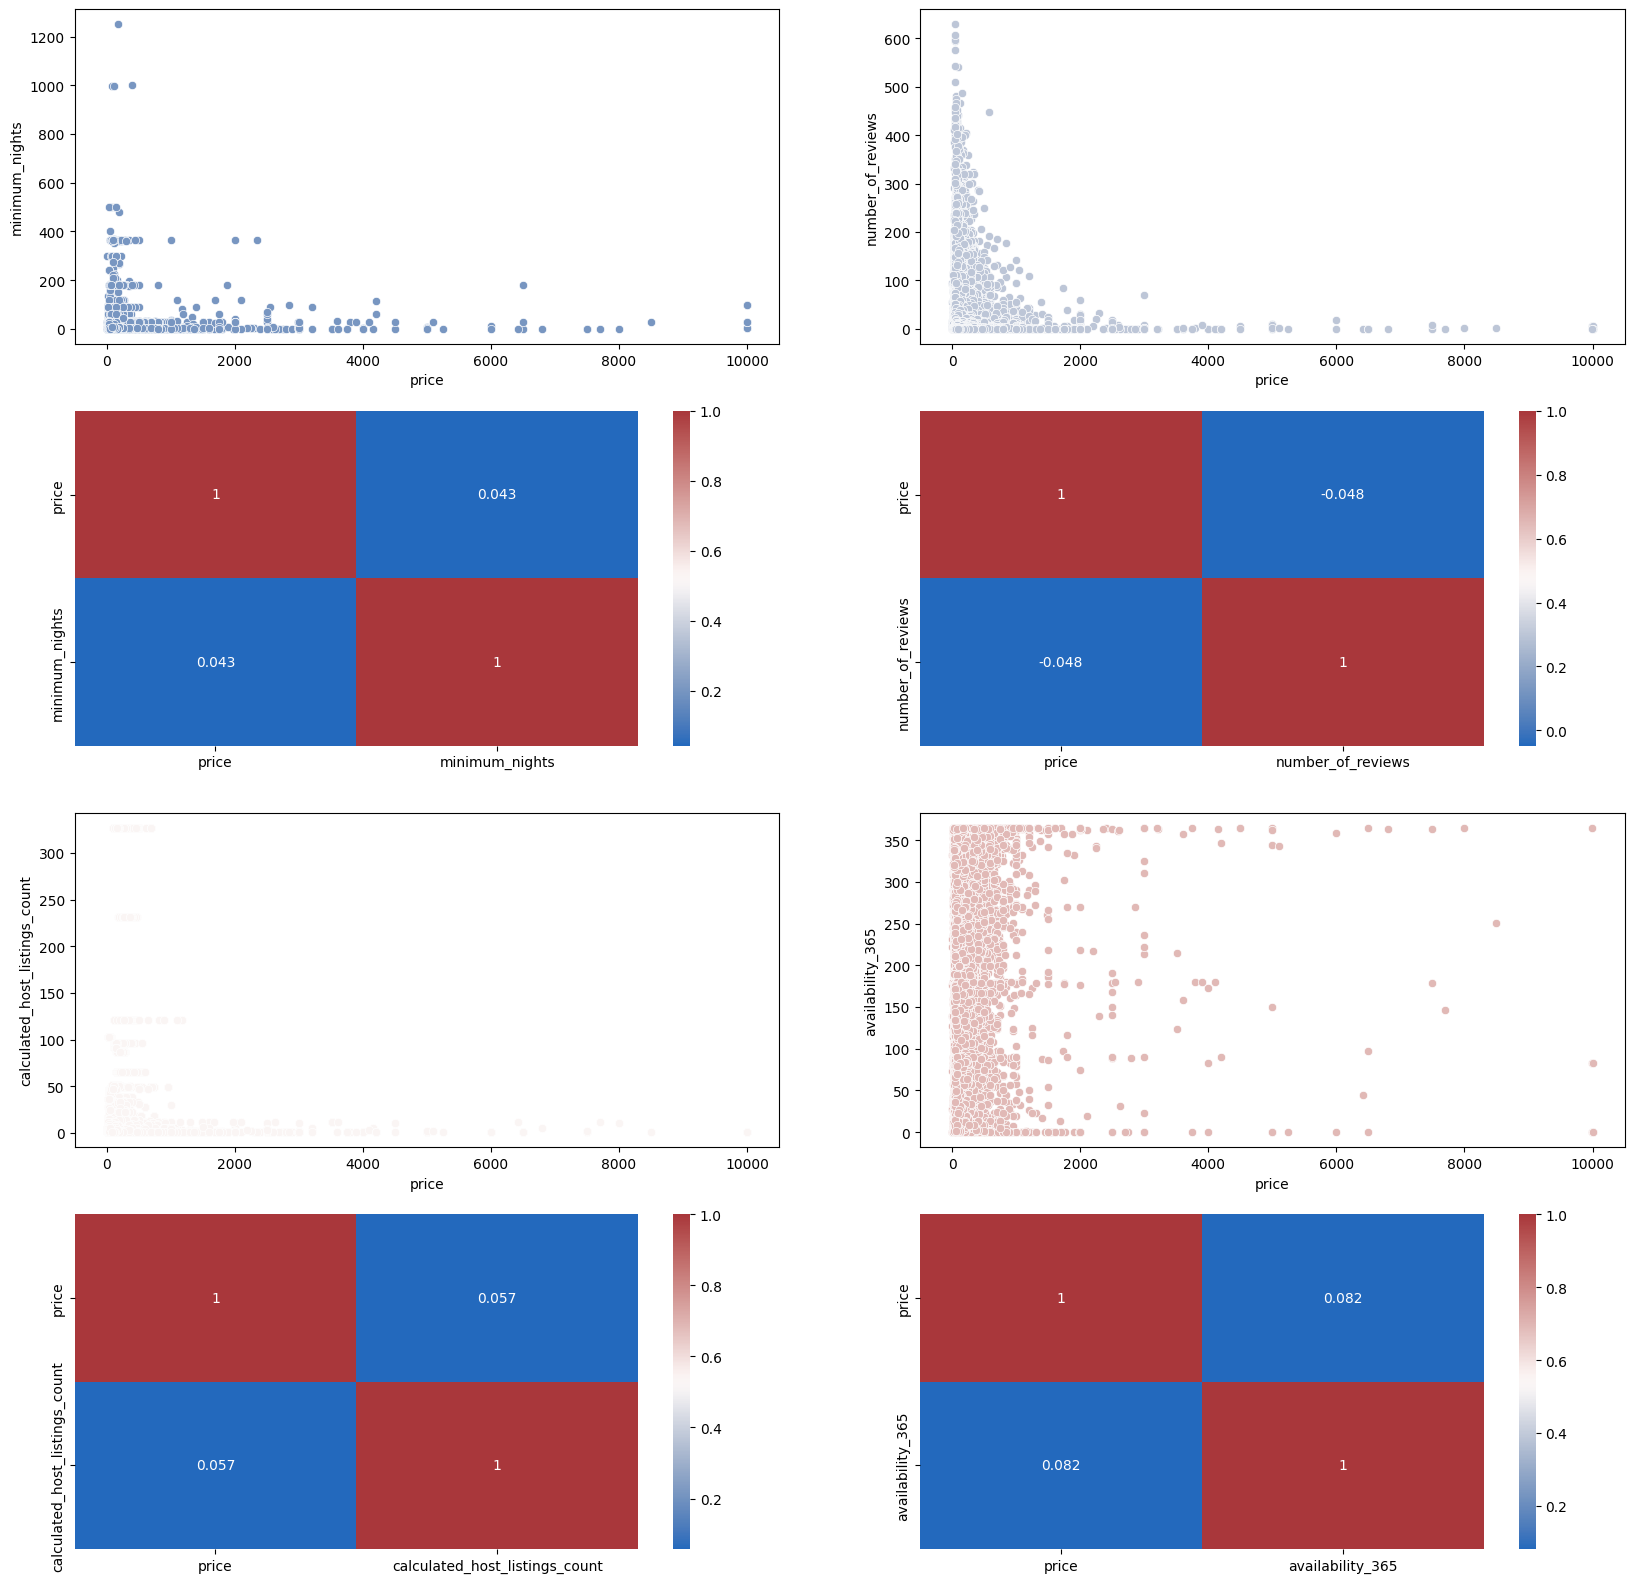

In [9]:
# Relationship between 'price' and 'minimum_night', 'number_of_reviews', 'calculated_host_listing' and 'availability' with a scatterplot and a heatmap
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# Scatterplot for 'price' and 'minimum_nights'
sns.scatterplot(data = df_airbnb_ny, x = 'price', y = 'minimum_nights', ax=ax[0,0], color=colors[0])
# Heatmap for 'price' and 'minimum_nights'
sns.heatmap(data = df_airbnb_ny[['price', 'minimum_nights']].corr(), ax=ax[1,0], annot=True, cmap='vlag')
# Scatterplot for 'price' and 'number_of_reviews'
sns.scatterplot(data = df_airbnb_ny, x = 'price', y = 'number_of_reviews', ax=ax[0,1], color=colors[1])
# Heatmap for 'price' and 'number_of_reviews'
sns.heatmap(data = df_airbnb_ny[['price', 'number_of_reviews']].corr(), ax=ax[1,1], annot=True, cmap='vlag')
# Scatterplot for 'price' and 'calculated_host_listings_count'
sns.scatterplot(data = df_airbnb_ny, x = 'price', y = 'calculated_host_listings_count', ax=ax[2,0], color=colors[2])
# Heatmap for 'price' and 'calculated_host_listings_count'
sns.heatmap(data = df_airbnb_ny[['price', 'calculated_host_listings_count']].corr(), ax=ax[3,0], annot=True, cmap='vlag')
# Scatterplot for 'price' and 'availability_365'
sns.scatterplot(data = df_airbnb_ny, x = 'price', y = 'availability_365', ax=ax[2,1], color=colors[3])
# Heatmap for 'price' and 'availability_365'
sns.heatmap(data = df_airbnb_ny[['price', 'availability_365']].corr(), ax=ax[3,1], annot=True, cmap='vlag')

plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

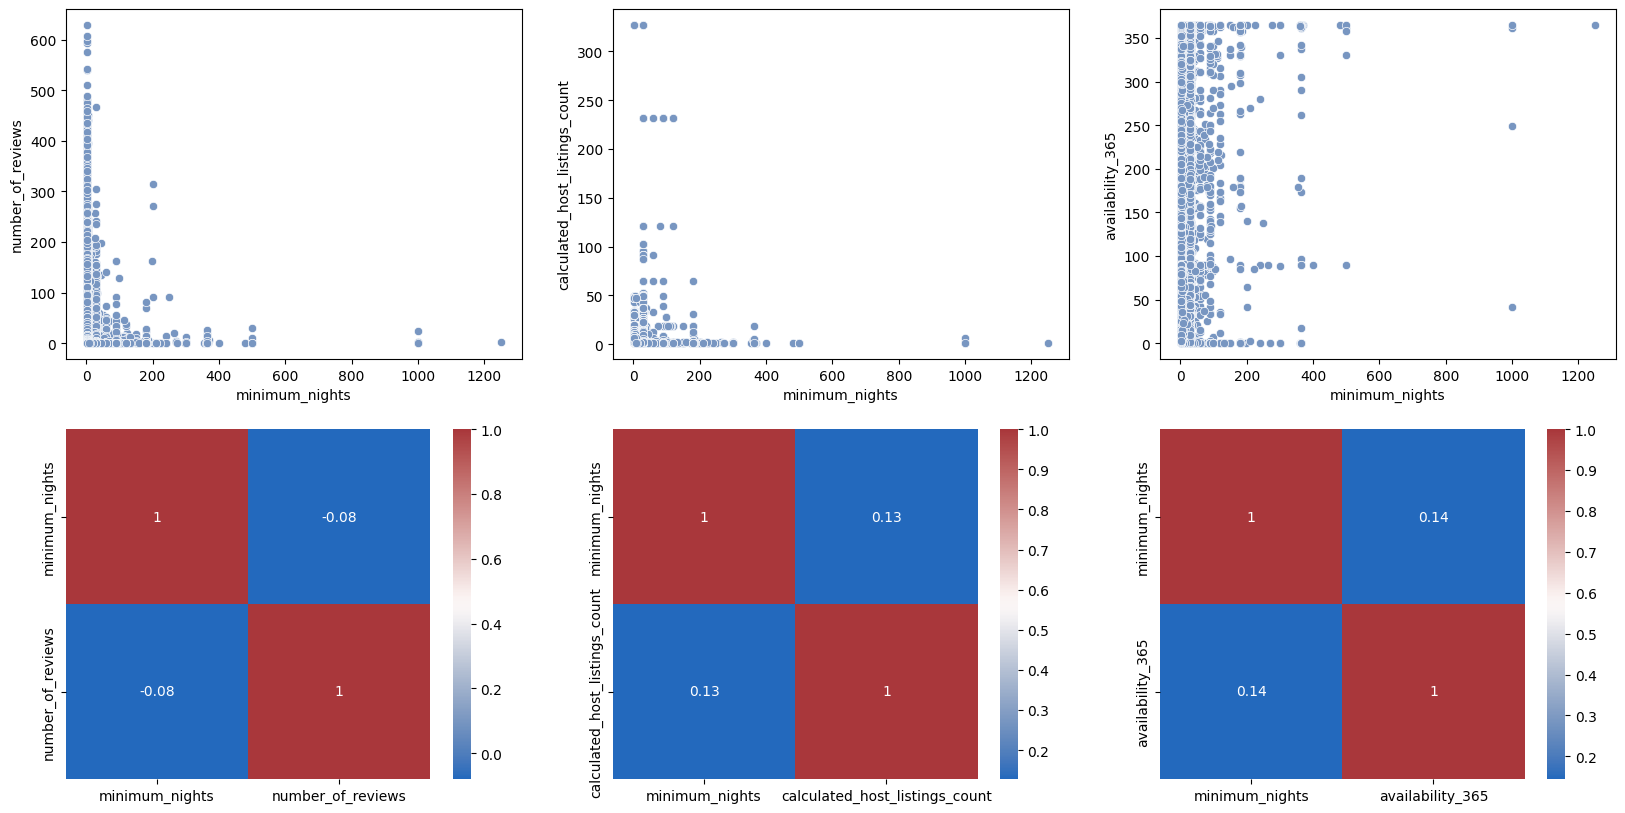

In [10]:
# Relationship between 'minimum_nights' and 'number_of_reviews', 'calculated_hast_listing_count' and 'availability_365' with a scatterplot and a heatmap
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Scatterplot for 'minimum_nights' and 'number_of_reviews'
sns.scatterplot(data = df_airbnb_ny, x = 'minimum_nights', y = 'number_of_reviews', ax=ax[0,0], color=colors[0])
# Heatmap for 'minimum_nights' and 'number_of_reviews'
sns.heatmap(data = df_airbnb_ny[['minimum_nights', 'number_of_reviews']].corr(), ax=ax[1,0], annot=True, cmap='vlag')
# Scatterplot for 'minimum_nights' and 'calculated_host_listings_count'
sns.scatterplot(data = df_airbnb_ny, x = 'minimum_nights', y = 'calculated_host_listings_count', ax=ax[0,1], color=colors[0])
# Heatmap for 'minimum_nights' and 'calculated_host_listings_count'
sns.heatmap(data = df_airbnb_ny[['minimum_nights', 'calculated_host_listings_count']].corr(), ax=ax[1,1], annot=True, cmap='vlag')
# Scatterplot for 'minimum_nights' and 'availability_365'
sns.scatterplot(data = df_airbnb_ny, x = 'minimum_nights', y = 'availability_365', ax=ax[0,2], color=colors[0])
# Heatmap for 'minimum_nights' and 'availability_365'
sns.heatmap(data = df_airbnb_ny[['minimum_nights', 'availability_365']].corr(), ax=ax[1,2], annot=True, cmap='vlag')

plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


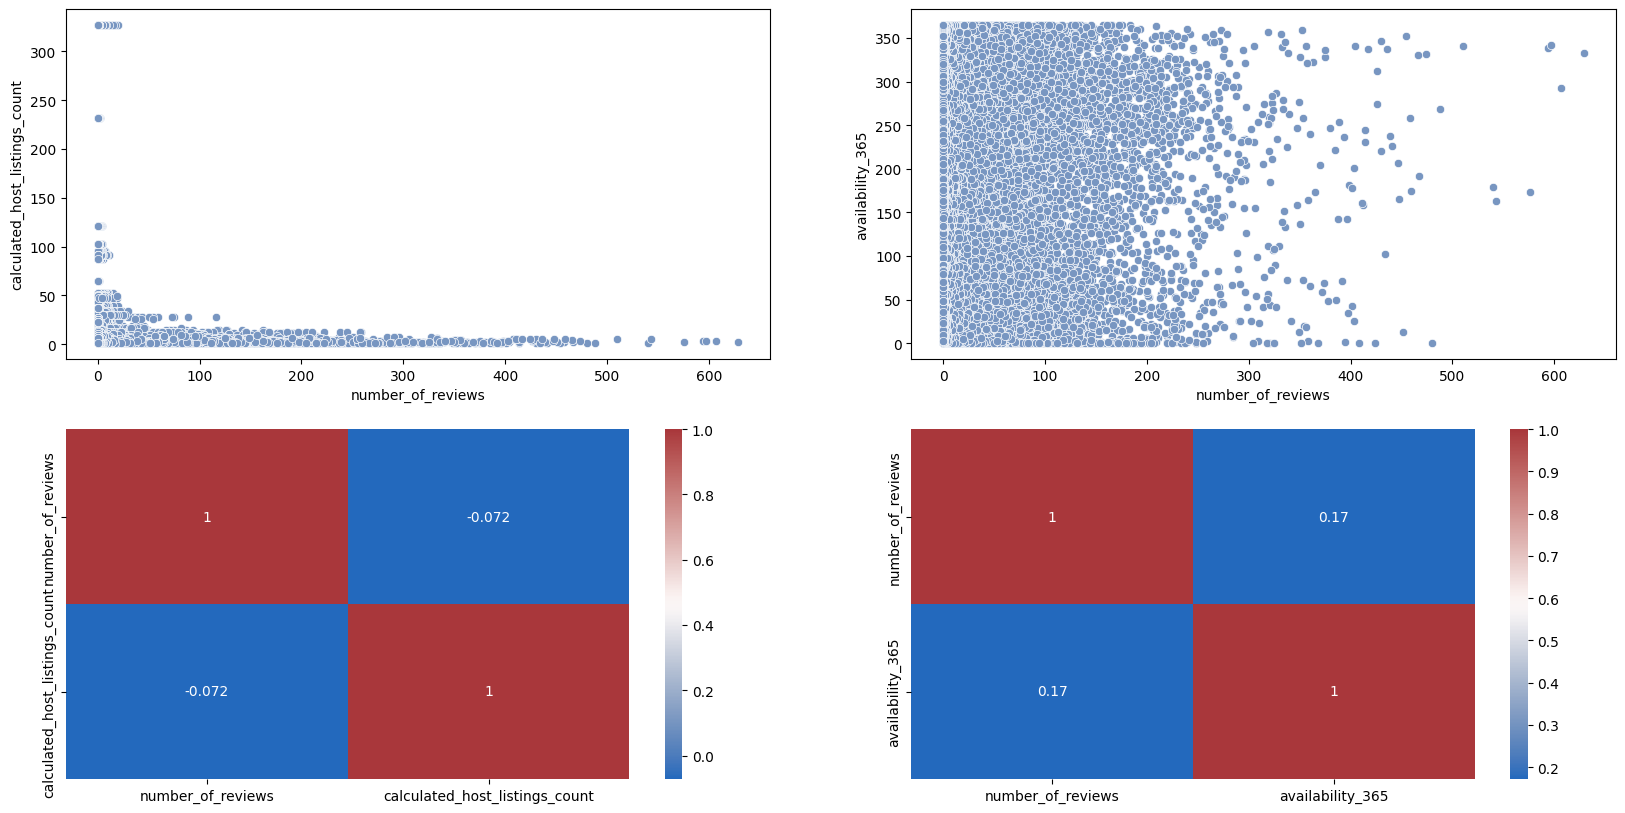

In [11]:
# Relationship between 'number_of_reviews' and 'calculated_host_listings_count' and 'availability_365' with a scatterplot and a heatmap
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Scatterplot for 'number_of_reviews' and 'calculated_host_listings_count'
sns.scatterplot(data = df_airbnb_ny, x = 'number_of_reviews', y = 'calculated_host_listings_count', ax=ax[0,0], color=colors[0])
# Heatmap for 'number_of_reviews' and 'calculated_host_listings_count'
sns.heatmap(data = df_airbnb_ny[['number_of_reviews', 'calculated_host_listings_count']].corr(), ax=ax[1,0], annot=True, cmap='vlag')
# Scatterplot for 'number_of_reviews' and 'availability_365'
sns.scatterplot(data = df_airbnb_ny, x = 'number_of_reviews', y = 'availability_365', ax=ax[0,1], color=colors[0])
# Heatmap for 'number_of_reviews' and 'availability_365'
sns.heatmap(data = df_airbnb_ny[['number_of_reviews', 'availability_365']].corr(), ax=ax[1,1], annot=True, cmap='vlag')

plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


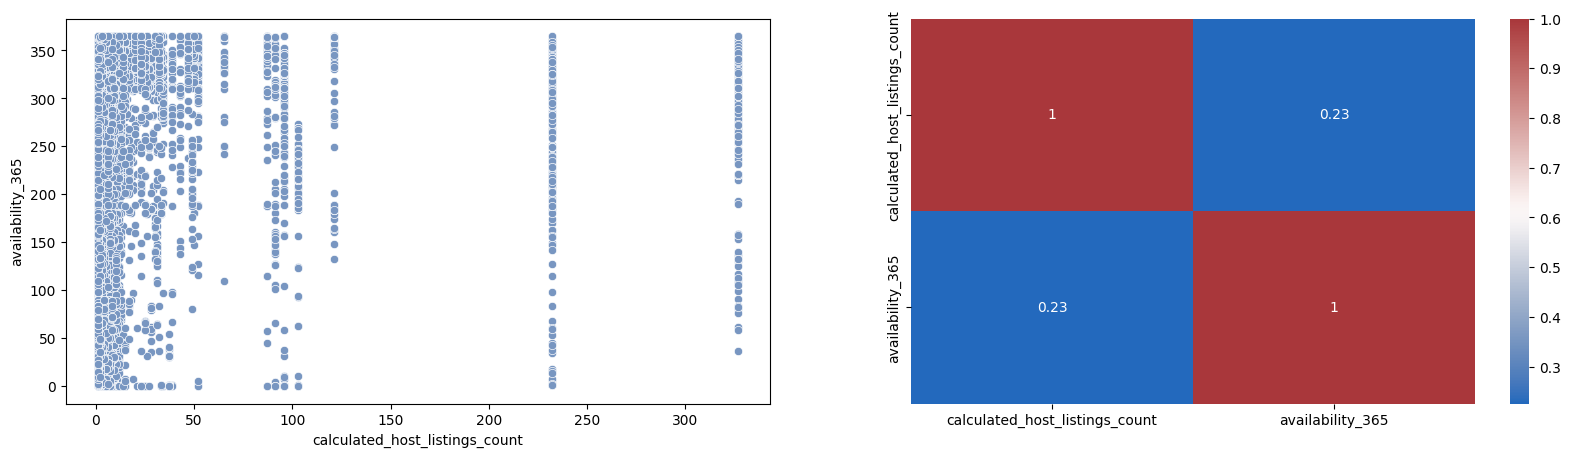

In [12]:
# Relationship between 'calculated_host_listings_count' and 'availability_365' with a scatterplot and a heatmap
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Scatterplot for 'calculated_host_listings_count' and 'availability_365'
sns.scatterplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', y = 'availability_365', ax=ax[0], color=colors[0])
# Heatmap for 'calculated_host_listings_count' and 'availability_365'
sns.heatmap(data = df_airbnb_ny[['calculated_host_listings_count', 'availability_365']].corr(), ax=ax[1], annot=True, cmap='vlag')

plt.show()

In [13]:
# Convert the categorical variables to numerical variables using the factorize method
df_airbnb_ny['areas_n'] = pd.factorize(df_airbnb_ny['areas'])[0]
df_airbnb_ny['neighborhood_n'] = pd.factorize(df_airbnb_ny['neighborhood'])[0]
df_airbnb_ny['room_type_n'] = pd.factorize(df_airbnb_ny['room_type'])[0]
df_airbnb_ny.head()

,host_id,areas,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,areas_n,neighborhood_n,room_type_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,2,0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,3,1
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,4,1


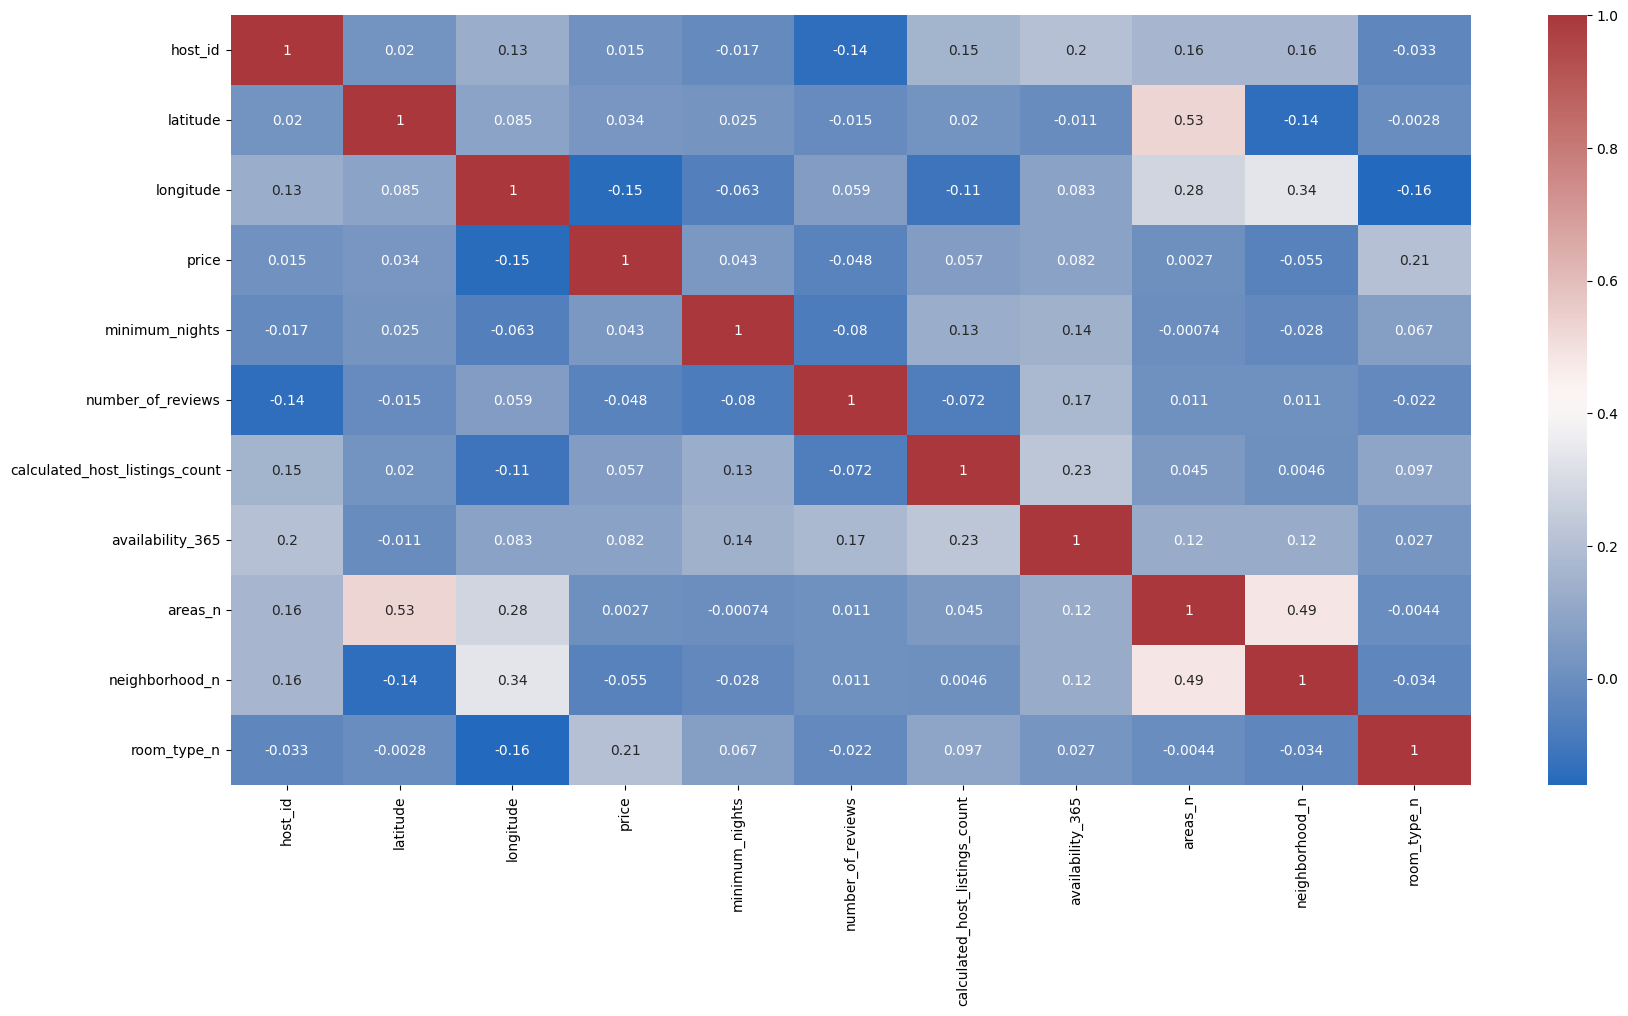

In [14]:
# Relationship between all the variables with a heatmap
fig, ax = plt.subplots(figsize=(20, 10))

# Heatmap for all the variables
sns.heatmap(data = df_airbnb_ny.corr(numeric_only = True), annot=True, cmap='vlag')

plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

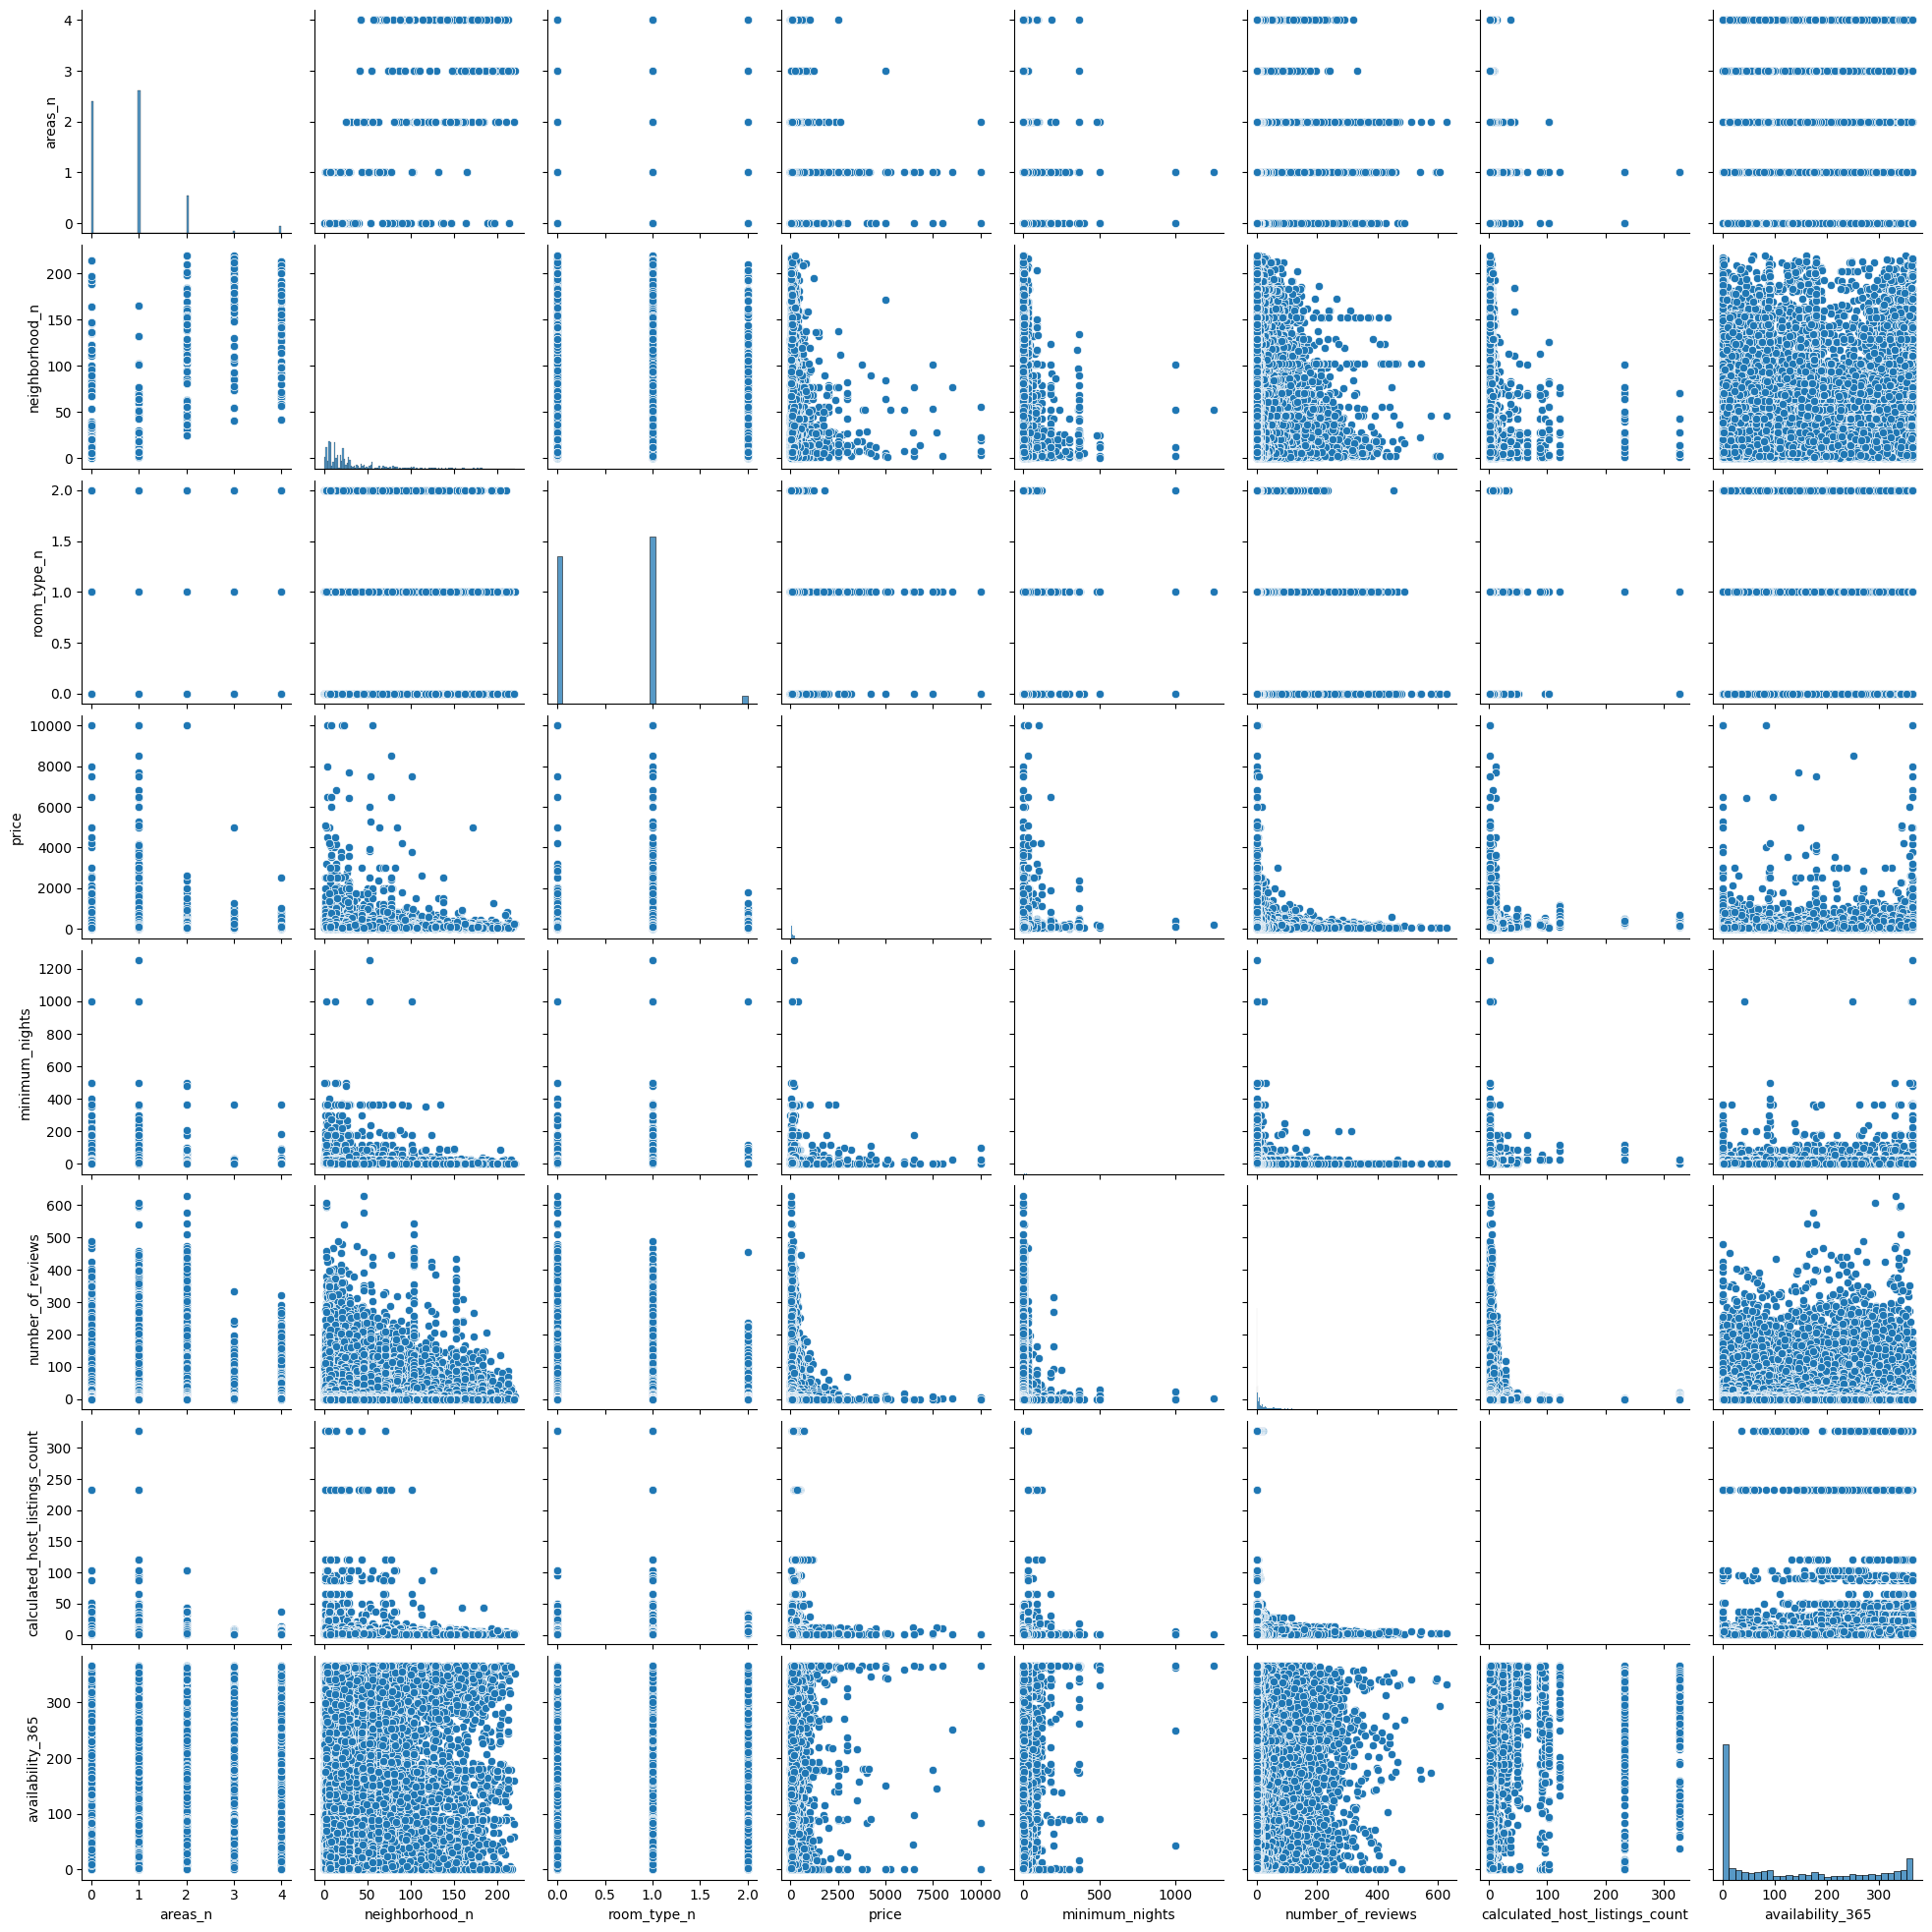

In [15]:
# Now, We are going to analyze all the data at the same time with a pairplot
sns.pairplot(data=df_airbnb_ny[['areas_n', 'neighborhood_n', 'room_type_n', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']], palette='vlag')
plt.show()

##### Step 3: Feature engineering

In [16]:
# Once we have explored the data, we can start the feature engineering
# The first step is to analyze the outliers
# We are going to use the IQR method to detect the outliers
# We are going to use the columns 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' and 'availability_365'

# Calculate the IQR for each column
Q1_price = df_airbnb_ny['price'].quantile(0.25)
Q3_price = df_airbnb_ny['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_minimum_nights = df_airbnb_ny['minimum_nights'].quantile(0.25)
Q3_minimum_nights = df_airbnb_ny['minimum_nights'].quantile(0.75)
IQR_minimum_nights = Q3_minimum_nights - Q1_minimum_nights

Q1_number_of_reviews = df_airbnb_ny['number_of_reviews'].quantile(0.25)
Q3_number_of_reviews = df_airbnb_ny['number_of_reviews'].quantile(0.75)
IQR_number_of_reviews = Q3_number_of_reviews - Q1_number_of_reviews

Q1_calculated_host_listings_count = df_airbnb_ny['calculated_host_listings_count'].quantile(0.25)
Q3_calculated_host_listings_count = df_airbnb_ny['calculated_host_listings_count'].quantile(0.75)
IQR_calculated_host_listings_count = Q3_calculated_host_listings_count - Q1_calculated_host_listings_count

Q1_availability_365 = df_airbnb_ny['availability_365'].quantile(0.25)
Q3_availability_365 = df_airbnb_ny['availability_365'].quantile(0.75)
IQR_availability_365 = Q3_availability_365 - Q1_availability_365

# Calculate the lower and upper limits for each column
lower_limit_price = Q1_price - 1.5 * IQR_price
upper_limit_price = Q3_price + 1.5 * IQR_price

lower_limit_minimum_nights = Q1_minimum_nights - 1.5 * IQR_minimum_nights
upper_limit_minimum_nights = Q3_minimum_nights + 1.5 * IQR_minimum_nights

lower_limit_number_of_reviews = Q1_number_of_reviews - 1.5 * IQR_number_of_reviews
upper_limit_number_of_reviews = Q3_number_of_reviews + 1.5 * IQR_number_of_reviews

lower_limit_calculated_host_listings_count = Q1_calculated_host_listings_count - 1.5 * IQR_calculated_host_listings_count
upper_limit_calculated_host_listings_count = Q3_calculated_host_listings_count + 1.5 * IQR_calculated_host_listings_count

lower_limit_availability_365 = Q1_availability_365 - 1.5 * IQR_availability_365
upper_limit_availability_365 = Q3_availability_365 + 1.5 * IQR_availability_365

# Calculate the number of outliers for each column
outliers_price = df_airbnb_ny[(df_airbnb_ny['price'] < lower_limit_price) | (df_airbnb_ny['price'] > upper_limit_price)]
outliers_minimum_nights = df_airbnb_ny[(df_airbnb_ny['minimum_nights'] < lower_limit_minimum_nights) | (df_airbnb_ny['minimum_nights'] > upper_limit_minimum_nights)]
outliers_number_of_reviews = df_airbnb_ny[(df_airbnb_ny['number_of_reviews'] < lower_limit_number_of_reviews) | (df_airbnb_ny['number_of_reviews'] > upper_limit_number_of_reviews)]
outliers_calculated_host_listings_count = df_airbnb_ny[(df_airbnb_ny['calculated_host_listings_count'] < lower_limit_calculated_host_listings_count) | (df_airbnb_ny['calculated_host_listings_count'] > upper_limit_calculated_host_listings_count)]
outliers_availability_365 = df_airbnb_ny[(df_airbnb_ny['availability_365'] < lower_limit_availability_365) | (df_airbnb_ny['availability_365'] > upper_limit_availability_365)]

# Calculate the percentage of outliers for each column
percentage_outliers_price = len(outliers_price) / len(df_airbnb_ny) * 100
percentage_outliers_minimum_nights = len(outliers_minimum_nights) / len(df_airbnb_ny) * 100
percentage_outliers_number_of_reviews = len(outliers_number_of_reviews) / len(df_airbnb_ny) * 100
percentage_outliers_calculated_host_listings_count = len(outliers_calculated_host_listings_count) / len(df_airbnb_ny) * 100
percentage_outliers_availability_365 = len(outliers_availability_365) / len(df_airbnb_ny) * 100

# Print the results
print(f'Percentage of outliers in the column "price": {percentage_outliers_price}%')
print(f'Percentage of outliers in the column "minimum_nights": {percentage_outliers_minimum_nights}%')
print(f'Percentage of outliers in the column "number_of_reviews": {percentage_outliers_number_of_reviews}%')
print(f'Percentage of outliers in the column "calculated_host_listings_count": {percentage_outliers_calculated_host_listings_count}%')
print(f'Percentage of outliers in the column "availability_365": {percentage_outliers_availability_365}%')


Percentage of outliers in the column "price": 6.078331117701197%
Percentage of outliers in the column "minimum_nights": 13.512629103180284%
Percentage of outliers in the column "number_of_reviews": 12.314142550363023%
Percentage of outliers in the column "calculated_host_listings_count": 14.482053379691177%
Percentage of outliers in the column "availability_365": 0.0%


In [17]:
# We can see that the percentage of outliers in the columns 'price' and 'minimum_nights' is very high, so we are going to remove them from the dataset
# We are going to remove the rows with outliers in the columns 'price' and 'minimum_nights'
df_airbnb_ny = df_airbnb_ny[(df_airbnb_ny['price'] >= lower_limit_price) & (df_airbnb_ny['price'] <= upper_limit_price)]
df_airbnb_ny = df_airbnb_ny[(df_airbnb_ny['minimum_nights'] >= lower_limit_minimum_nights) & (df_airbnb_ny['minimum_nights'] <= upper_limit_minimum_nights)]
df_airbnb_ny

,host_id,areas,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,areas_n,neighborhood_n,room_type_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,2,0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,3,1
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0,6,0
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0,21,0
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,2,1
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,1,7,2


In [18]:
# Now, we are going to check the distribution of the data again
df_airbnb_ny.describe(include='all')

,host_id,areas,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,areas_n,neighborhood_n,room_type_n
count,3.973800e+04,39738,39738,39738.000000,39738.000000,39738,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000
unique,NaN,5,219,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Brooklyn,Williamsburg,NaN,NaN,Private room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17348,3363,NaN,NaN,19866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.621640e+07,NaN,NaN,40.727573,-73.949146,NaN,119.001258,2.696160,26.377548,3.073054,97.169837,0.783507,31.074211,0.524989
std,7.750186e+07,NaN,NaN,0.056293,0.047708,NaN,67.184264,1.863537,47.474653,19.743865,124.366313,0.882943,35.956957,0.547000
min,2.571000e+03,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.824440e+06,NaN,NaN,40.688080,-73.981040,NaN,65.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000
50%,3.073608e+07,NaN,NaN,40.720080,-73.953320,NaN,100.000000,2.000000,7.000000,1.000000,25.000000,1.000000,19.000000,1.000000
75%,1.036117e+08,NaN,NaN,40.763260,-73.932170,NaN,154.750000,3.000000,29.000000,2.000000,179.000000,1.000000,38.000000,1.000000


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

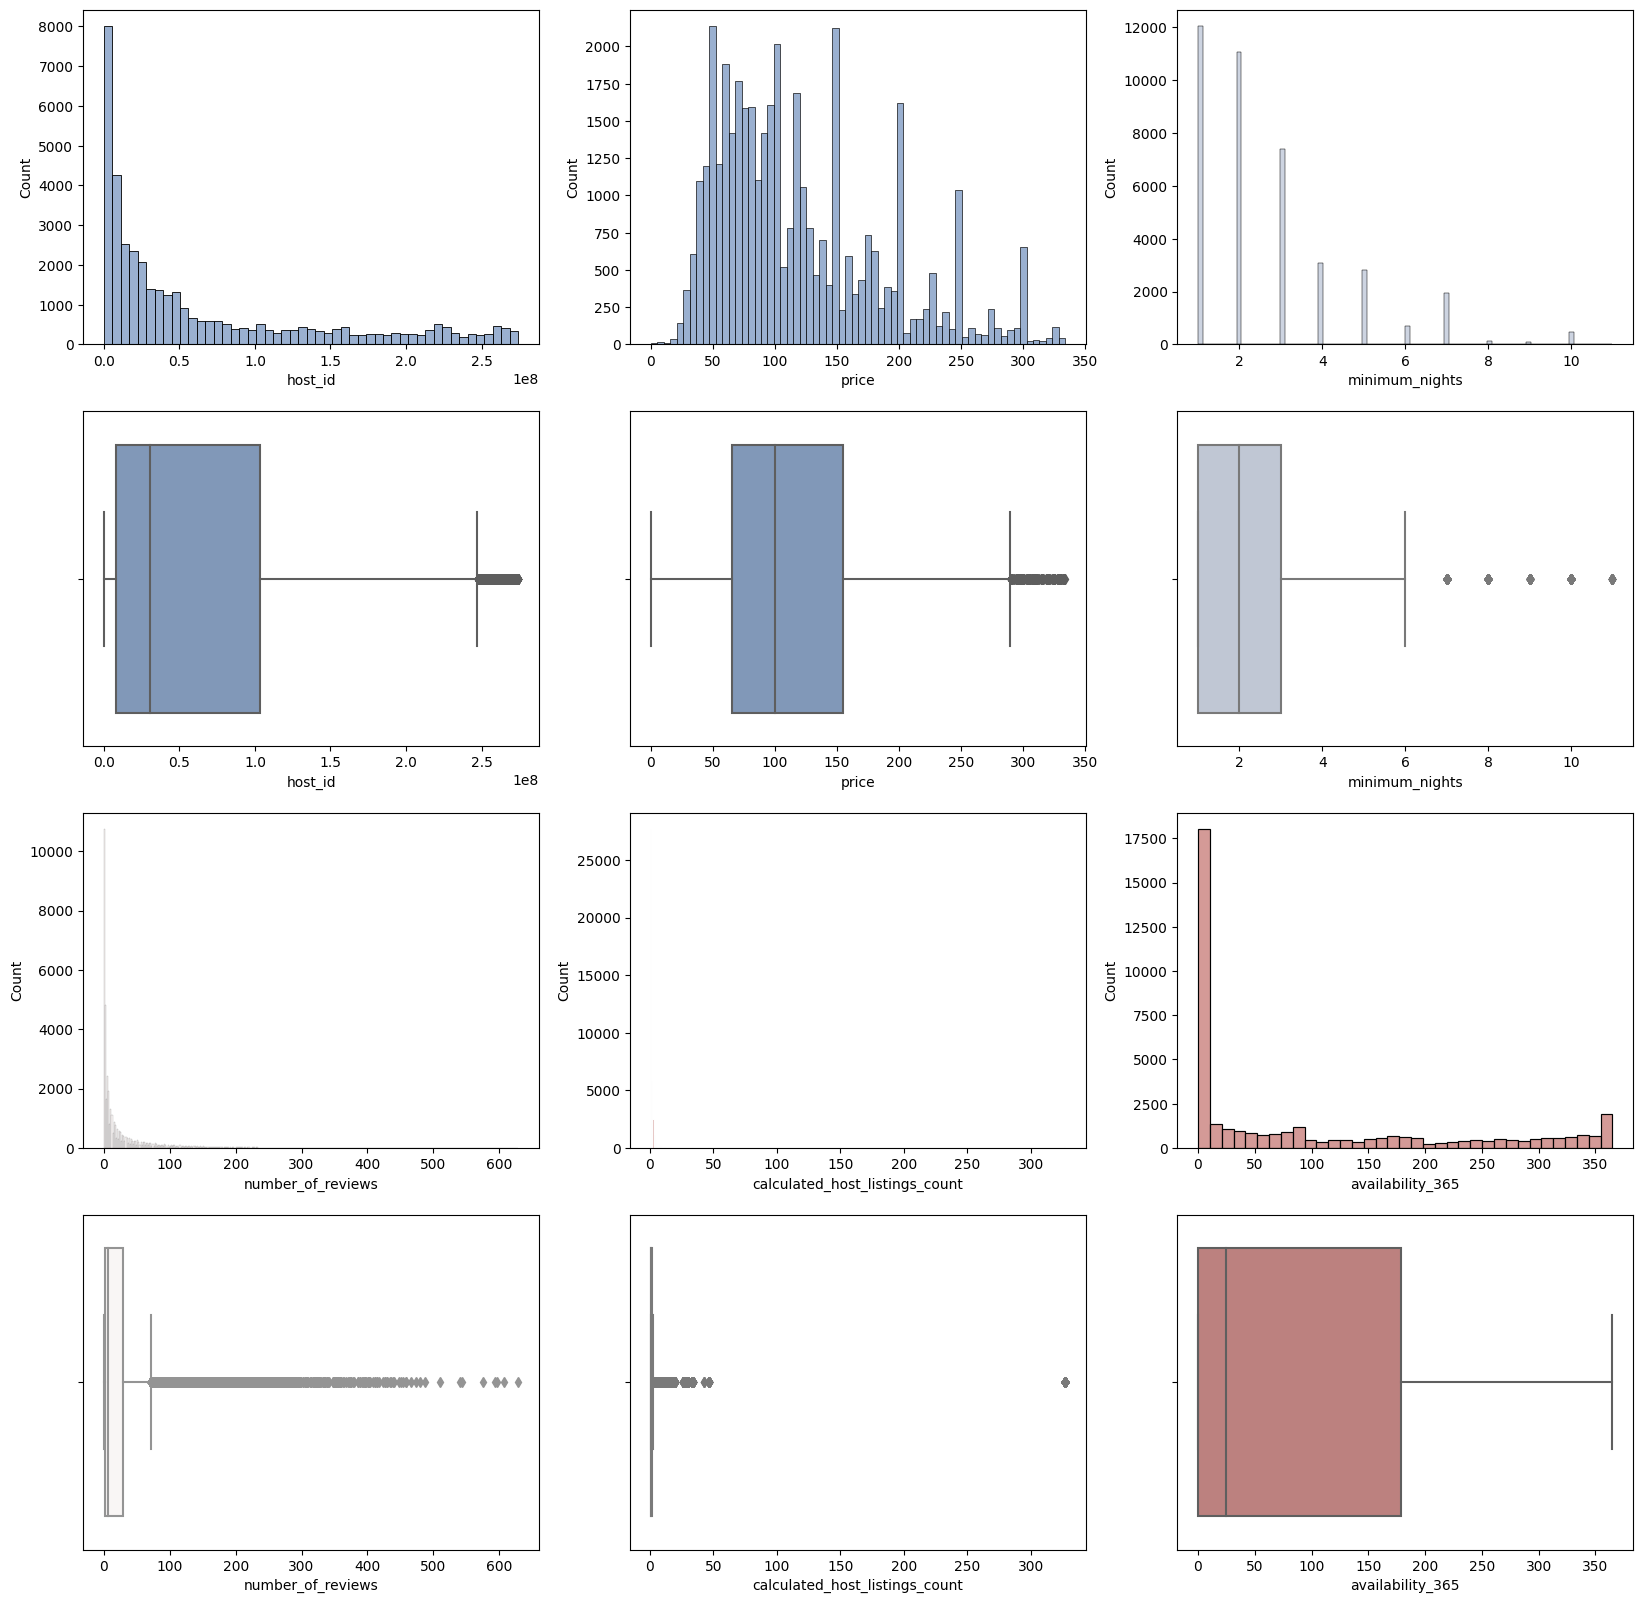

In [19]:
# Now, we are going to check the distribution of the numerical columns with a histogram and a boxplot
fig, ax = plt.subplots(4, 3, figsize=(20, 20))

colors = sns.color_palette("vlag", 5)

# Histogram for 'host_id'
sns.histplot(data = df_airbnb_ny, x = 'host_id', ax=ax[0,0], color=colors[0])
# Boxplot for 'host_id'
sns.boxplot(data = df_airbnb_ny, x = 'host_id', ax=ax[1,0], color=colors[0])
# Histogram for 'price'
sns.histplot(data = df_airbnb_ny, x = 'price', ax=ax[0,1], color=colors[0])
# Boxplot for 'price'
sns.boxplot(data = df_airbnb_ny, x = 'price', ax=ax[1,1], color=colors[0])
# Histogram for 'minimum_nights'
sns.histplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[0,2], color=colors[1])
# Boxplot for 'minimum_nights'
sns.boxplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[1,2], color=colors[1])
# Histogram for 'number_of_reviews'
sns.histplot(data = df_airbnb_ny, x = 'number_of_reviews', ax=ax[2,0], color=colors[2])
# Boxplot for 'number_of_reviews'
sns.boxplot(data = df_airbnb_ny, x = 'number_of_reviews', ax=ax[3,0], color=colors[2])
# Histogram for 'calculated_host_listings_count'
sns.histplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', ax=ax[2,1], color=colors[3])
# Boxplot for 'calculated_host_listings_count'
sns.boxplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', ax=ax[3,1], color=colors[3])
# Histogram for 'availability_365'
sns.histplot(data = df_airbnb_ny, x = 'availability_365', ax=ax[2,2], color=colors[4])
# Boxplot for 'availability_365'
sns.boxplot(data = df_airbnb_ny, x = 'availability_365', ax=ax[3,2], color=colors[4])

plt.show()

In [20]:
# For the feature scaling we are going to use sklearn and the MinMaxScaler method

# Create the scaler
scaler = MinMaxScaler()

# Scale the columns 'areas_n', 'neighborhood_n', 'room_type_n', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' and 'availability_365'
df_airbnb_ny[['areas_n', 'neighborhood_n', 'room_type_n', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = scaler.fit_transform(df_airbnb_ny[['areas_n', 'neighborhood_n', 'room_type_n', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])
df_airbnb_ny

,host_id,areas,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,areas_n,neighborhood_n,room_type_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.446108,0.0,0.014308,0.015337,1.000000,0.00,0.000000,0.0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.673653,0.0,0.071542,0.003067,0.972603,0.25,0.004545,0.5
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,0.449102,0.2,0.000000,0.000000,1.000000,0.25,0.009091,0.0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.266467,0.0,0.429253,0.000000,0.531507,0.00,0.013636,0.5
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,0.239521,0.9,0.014308,0.000000,0.000000,0.25,0.018182,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,0.209581,0.1,0.000000,0.003067,0.024658,0.00,0.027273,0.0
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,0.119760,0.3,0.000000,0.003067,0.098630,0.00,0.095455,0.0
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,0.344311,0.9,0.000000,0.000000,0.073973,0.25,0.009091,0.5
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.164671,0.0,0.000000,0.015337,0.005479,0.25,0.031818,1.0


##### Step 4: Feature selection

In [22]:
# To finish the EDA we are going to do a feature selection
# We are going to use the columns 'areas_n', 'neighborhood_n', 'room_type_n', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' and 'availability_365' to predict the price of the Airbnb
# We are going to use the SelectKBest method from sklearn to select the best features

# Create the selector
selector = SelectKBest(score_func=f_regression, k=3)

# Fit the selector
selector.fit(df_airbnb_ny[['areas_n', 'neighborhood_n', 'room_type_n', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']], df_airbnb_ny['price'])

# Obtain the scores
scores = selector.scores_
print(scores)

# Obtain the p-values
pvalues = selector.pvalues_
print(pvalues)

# Create a DataFrame with the scores and the p-values
df_scores = pd.DataFrame({'scores': scores, 'pvalues': pvalues}, index=['areas_n', 'neighborhood_n', 'room_type_n', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'])

# Print the DataFrame
print(df_scores)

[   42.62092571   907.38308341 11943.75097628   143.08996164
    24.12573121   315.16515793    29.25081656]
[6.72436120e-011 4.05271875e-197 0.00000000e+000 6.39955725e-033
 9.06043489e-007 3.06019909e-070 6.39556971e-008]
                                      scores        pvalues
areas_n                            42.620926   6.724361e-11
neighborhood_n                    907.383083  4.052719e-197
room_type_n                     11943.750976   0.000000e+00
minimum_nights                    143.089962   6.399557e-33
number_of_reviews                  24.125731   9.060435e-07
calculated_host_listings_count    315.165158   3.060199e-70
availability_365                   29.250817   6.395570e-08


In [24]:
# We can see that the best features to predict the price of the Airbnb are 'areas_n', 'neighborhood_n' and 'room_type_n'
# We are going to use these features to predict the price of the Airbnb

# Save the raw dataset
df_airbnb_ny.to_csv('/workspace/new_york_city_airbnb_eda/data/raw/airbnb_ny.csv', index=False)

# Save the cleaned dataset
df_airbnb_ny.to_csv('/workspace/new_york_city_airbnb_eda/data/interim/airbnb_ny.csv', index=False)

# Save the dataset with the best features
df_airbnb_ny[['areas_n', 'neighborhood_n', 'room_type_n']].to_csv('/workspace/new_york_city_airbnb_eda/data/processed/airbnb_ny_features.csv', index=False)

# Save the dataset with the best features and the target
df_airbnb_ny[['areas_n', 'neighborhood_n', 'room_type_n', 'price']].to_csv('/workspace/new_york_city_airbnb_eda/data/processed/airbnb_ny_features_target.csv', index=False)
